# 1. Import library

In [1]:
import copy, math
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 2. Preprocess the data

In [2]:
df = pd.read_csv('Insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 3. Data analysis and visualization

In [5]:
#sex
l = LabelEncoder()
l.fit(df.sex.drop_duplicates()) 
df.sex = l.transform(df.sex)
# smoker or not
l.fit(df.smoker.drop_duplicates()) 
df.smoker = l.transform(df.smoker)
#region
l.fit(df.region.drop_duplicates()) 
df.region = l.transform(df.region)

In [6]:
#correlation checking
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot: >

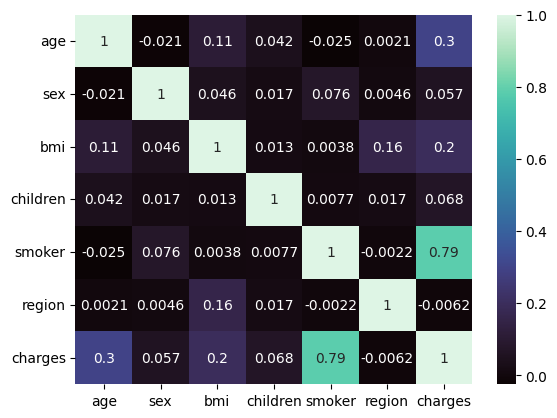

In [7]:
corr = df.corr()
sns.heatmap(corr,cmap="mako",annot=True)

/var/folders/hp/2dbkkkm52hsd14c13kbw0vr00000gp/T/ipykernel_7368/3754190015.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])
/var/folders/hp/2dbkkkm52hsd14c13kbw0vr00000gp/T/ipykernel_7368/3754190015.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['charges'].value

<AxesSubplot: title={'center': 'Log Transform'}, ylabel='Density'>

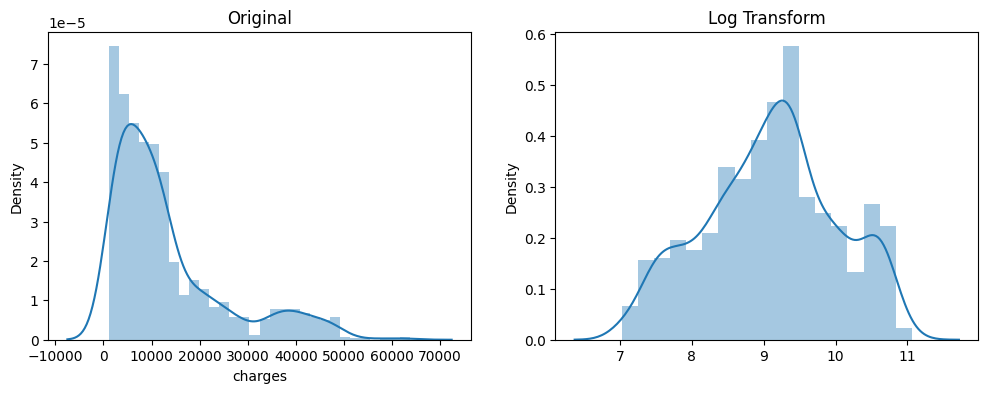

In [4]:
#charge distribution
f = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Original')
sns.distplot(df['charges'])

plt.subplot(1,2,2)
plt.title('Log Transform')
sns.distplot(np.log(df['charges'].values))


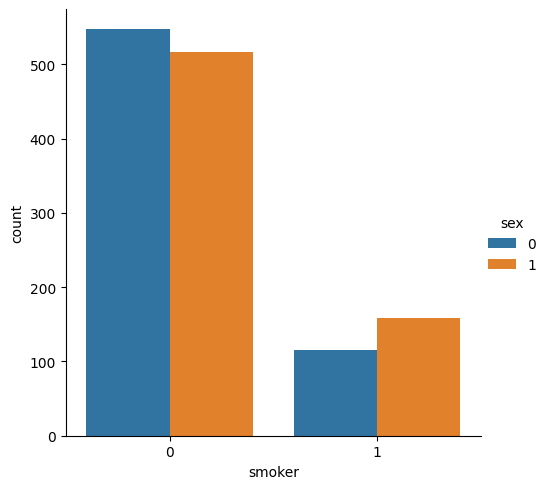

In [8]:
sns.catplot(data=df, x='smoker',kind='count',hue='sex')

Text(0.5, 1.0, 'Age vs charges')

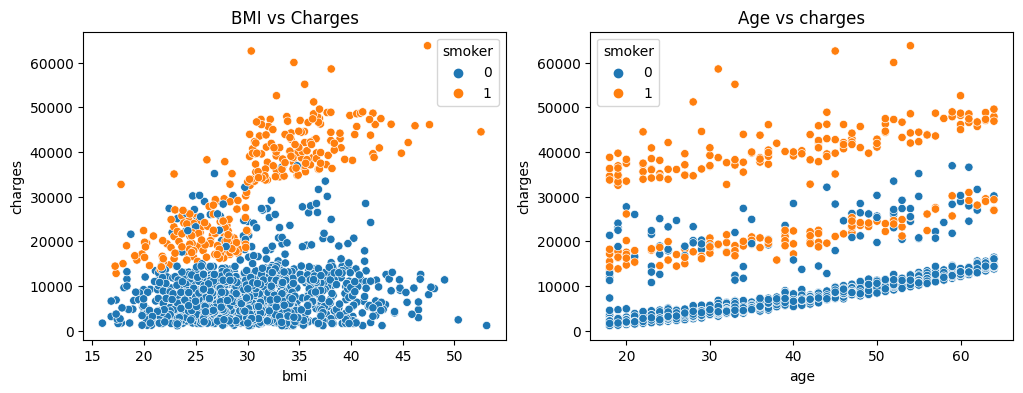

In [9]:
f = plt.figure(figsize=(12,4))
#bmi vs charges
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='bmi', y='charges',hue='smoker')
plt.title("BMI vs Charges")

#age vs charges
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Age vs charges')

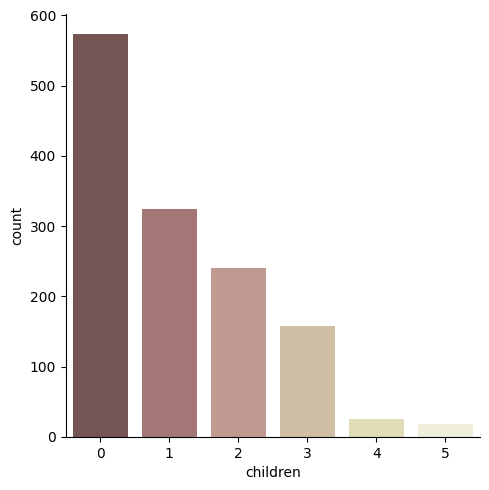

In [10]:
sns.catplot(data=df, x='children', kind='count',palette='pink')

<AxesSubplot: title={'center': 'children number vs charges'}, xlabel='children', ylabel='charges'>

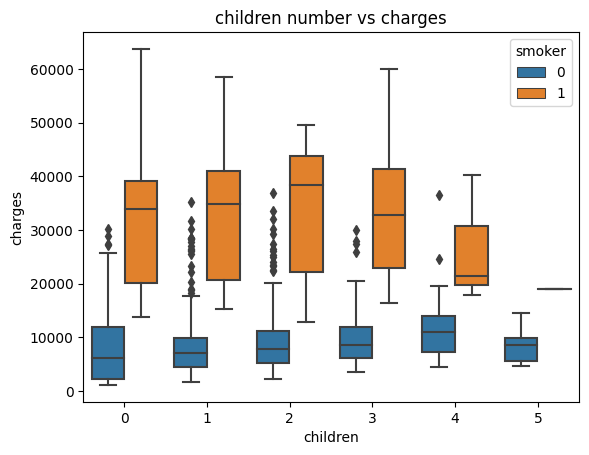

In [11]:
#children vs charge
plt.title('children number vs charges')
sns.boxplot(data=df, x='children', y='charges', hue='smoker', orient='v')

Text(0.5, 1.0, 'smokers and non-smokers who have children')

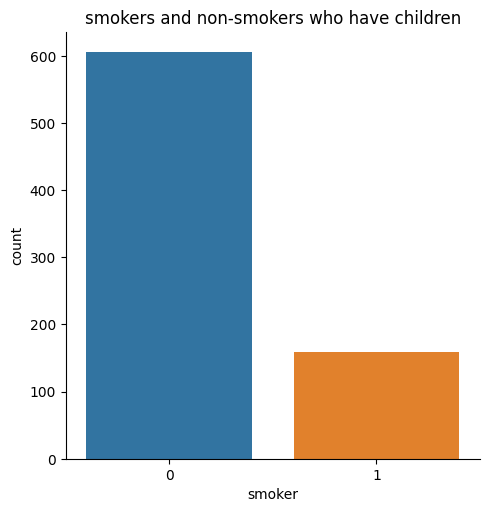

In [12]:
sns.catplot(data=df[df.children>0], x='smoker', kind='count')
plt.title('smokers and non-smokers who have children')

<AxesSubplot: xlabel='sex', ylabel='charges'>

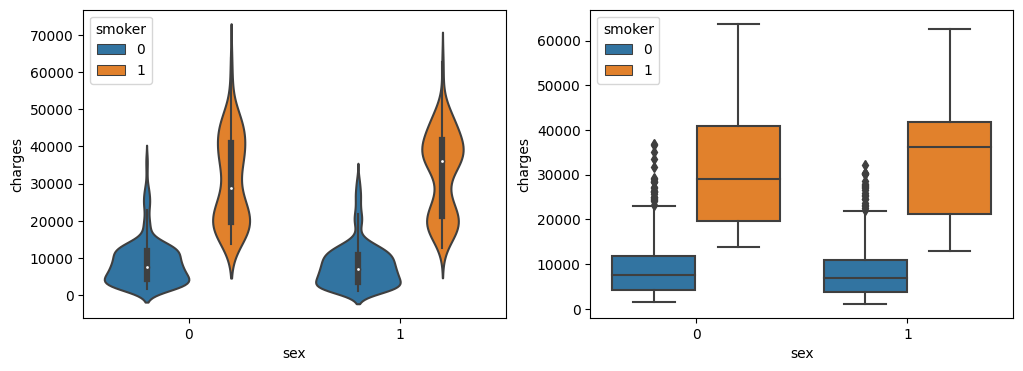

In [13]:
#gender and charges 1 for female and 0 for male
f = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.violinplot(data=df, x='sex', y='charges',hue='smoker')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='sex', y='charges',hue='smoker')

# 4. Insurance prediction using linear regression

## 4.1 Using Sklearn to implement linear regression

In [14]:
# Split test and train set
X = df.drop('charges',axis=1) 
y = df['charges']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.2,random_state = 0)
X_train1.shape

(1070, 6)

In [16]:
# Using sklearn to do linear regression
lr = LinearRegression()
lr.fit(X_train1, y_train1)

LinearRegression()

In [54]:
lr.coef_ #w

array([  253.99185244,   -24.32455098,   328.40261701,   443.72929547,
       23568.87948381,  -288.50857254])

In [18]:
lr.intercept_ #b

-11661.98390882441

In [19]:
#sklearn model prediction
y_pred1 = lr.predict(X_test1)

In [20]:
acc1 = r2_score(y_test1, y_pred1)
acc1

0.799874714544996

## 4.2. Construct the linear regression model ourselves

In [56]:
# In case of key error
X_train2 = X_train1.to_numpy()
y_train2 = y_train1.to_numpy()
X_test2 = X_test1.to_numpy()
y_test2 = y_test1.to_numpy()

In [23]:
def cost_function(x,y,w,b):
    '''
    x: input data array contains m examples with n features
    y: output data array
    w: coefficient vectors
    b: intercept
    
    '''
    m = x.shape[0]
    j_wb = 0
    
    for i in range(m):
        f_wb_i = np.dot(w,x[i])+b
        j_wb_i = (f_wb_i - y[i])**2
        j_wb += j_wb_i
        
    j_wb = j_wb / (2*m)
    
    return j_wb

In [24]:
# calculate derivative dj_dw and dj_db
def derivative(x,y,w,b):
    '''
    x: input data array contains m examples with n features
    y: output data array
    w: coefficient
    b: intercept
    
    dj_dw: derivative for w
    dj_db: derivative for b
    
    '''
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        f_wb_i = np.dot(w,x[i])+b
        for j in range(n):
            dj_dw[j] += (f_wb_i - y[i]) * x[i,j]
        dj_db += f_wb_i - y[i]
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    
    return dj_dw, dj_db

In [73]:
# calculate w and b using gradient descent
def gradient_descent(x, y, w0, b0, lr, it):
    '''
     x: input data array contains m examples with n features
     y: output data array
    w0: initial coefficient
    b0: initial intercept
    lr: learning rate
    it: number of iterations
    
    '''
    w = copy.deepcopy(w0)
    b = b0
    J_history = [] # recording cost function value after the iteration
    
    for i in range(it):
        dj_dw, dj_db = derivative(x,y,w,b)
        w = w - lr * dj_dw
        b = b - lr * dj_db
        
        #recording cost, w and b
        if i<100000:
            J_history.append(cost_function(x, y, w , b))
        if i% math.ceil(it/50)==0:
            print(f"Iteration: {i:5}, Cost: {float(J_history[-1]):e}")
    return w,b,J_history

In [76]:
#Initilization with vectorization
w0 = np.zeros((X_train2.shape[1],))
b0 = 0
it = 60000
alpha = 0.00075
w2, b2, J = gradient_descent(X_train2, y_train2, w0, b0, alpha, it)

Iteration:     0, Cost: 1.531393e+08
Iteration:  1200, Cost: 5.311861e+07
Iteration:  2400, Cost: 4.479398e+07
Iteration:  3600, Cost: 3.861805e+07
Iteration:  4800, Cost: 3.400828e+07
Iteration:  6000, Cost: 3.055836e+07
Iteration:  7200, Cost: 2.797027e+07
Iteration:  8400, Cost: 2.602346e+07
Iteration:  9600, Cost: 2.455441e+07
Iteration: 10800, Cost: 2.344169e+07
Iteration: 12000, Cost: 2.259509e+07
Iteration: 13200, Cost: 2.194749e+07
Iteration: 14400, Cost: 2.144895e+07
Iteration: 15600, Cost: 2.106227e+07
Iteration: 16800, Cost: 2.075972e+07
Iteration: 18000, Cost: 2.052060e+07
Iteration: 19200, Cost: 2.032947e+07
Iteration: 20400, Cost: 2.017479e+07
Iteration: 21600, Cost: 2.004793e+07
Iteration: 22800, Cost: 1.994241e+07
Iteration: 24000, Cost: 1.985338e+07
Iteration: 25200, Cost: 1.977719e+07
Iteration: 26400, Cost: 1.971110e+07
Iteration: 27600, Cost: 1.965303e+07
Iteration: 28800, Cost: 1.960140e+07
Iteration: 30000, Cost: 1.955501e+07
Iteration: 31200, Cost: 1.951296e+07
I

In [77]:
w2

array([  237.44214424,  -206.3688619 ,   253.84397794,   394.10233829,
       23347.56898432,  -360.93923484])

In [78]:
b2

-8322.151087624114

In [79]:
y_pred2 = np.dot(X_test2,w2)+b2

In [80]:
acc2 = r2_score(y_test2, y_pred2)
acc2

0.79674384207656